<a href="https://colab.research.google.com/github/shubham-kothari/Fashion-MNIST/blob/master/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



In [0]:
# Load the fashion-mnist pre-shuffled train data and test data

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# Print the number of training and test datasets
print(x_train.shape[0], 'train data set')
print(x_test.shape[0], 'test data set')

60000 train data set
10000 test data set


In [0]:

# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)

print("X Training Data shape:", x_train.shape, "Y train shape:", y_train.shape)
print("X Training Data shape:", x_test.shape, "Y train shape:", y_test.shape)

X Training Data shape: (60000, 28, 28) Y train shape: (60000,)
X Training Data shape: (10000, 28, 28) Y train shape: (10000,)


In [0]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9




Sandal


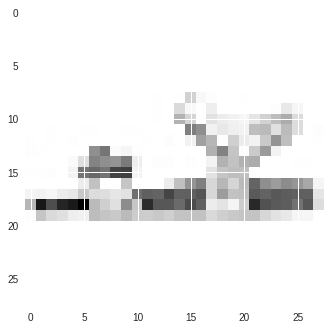

In [0]:
label = y_train[59999]
print(fashion_mnist_labels[label])
plt.imshow(x_train[59999])

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5900:], x_train[:5900] 
(y_train, y_valid) = y_train[5900:], y_train[:5900]



In [0]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [0]:
print(x_train.shape,x_valid.shape,x_test.shape)

(54100, 28, 28) (5900, 28, 28) (10000, 28, 28)


In [0]:
# Reshape input data from (28, 28) to (28, 28, 1)

x_train = x_train.reshape(54100,28,28,1)
x_valid = x_valid.reshape(5900,28,28, 1)
x_test = x_test.reshape(10000,28,28,1)



In [0]:

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (54100, 28, 28, 1) y_train shape: (54100, 10)
54100 train set
5900 validation set
10000 test set


In [0]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=3))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=3))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)


# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.0996


In [0]:
model.fit(x_train,y_train, batch_size=69, epochs=99, validation_data=(x_valid, y_valid))

Train on 54100 samples, validate on 5900 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/99
54100/54100 [==============================] - 8s 148us/sample - loss: 1.1042 - acc: 0.5818 - val_loss: 0.5389 - val_acc: 0.7917
Epoch 2/99
54100/54100 [==============================] - 8s 140us/sample - loss: 0.6698 - acc: 0.7483 - val_loss: 0.4594 - val_acc: 0.8175
Epoch 3/99
54100/54100 [==============================] - 7s 138us/sample - loss: 0.5969 - acc: 0.7795 - val_loss: 0.4207 - val_acc: 0.8476
Epoch 4/99
54100/54100 [==============================] - 7s 137us/sample - loss: 0.5484 - acc: 0.7995 - val_loss: 0.3981 - val_acc: 0.8510
Epoch 5/99
54100/54100 [==============================] - 7s 138us/sample - loss: 0.5126 - acc: 0.8162 - val_loss: 0.3635 - val_acc: 0.8620
Epoch 6/99
54100/54100 [==============================] - 7s 139us/sample - loss: 0.4926 - acc: 0.8256 - val_loss: 0.3509 - val_acc: 0.8632
Epoch 7/99
54100/54100 [==============================] - 7s 13